In [400]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# устанавливаем точность чисел с плавающей точкой
%precision %.4f

import warnings
warnings.filterwarnings('ignore')  # отключаем предупреждения

- [ ] Самостоятельно реализовать функцию **gradient_descent(X, y)**, которая по заданной обучающей выборке обучает модель линейной регрессии, оптимизируя функционал **методом градиентного спуска (Batch Gradient Descent, GD)** и возвращая вектор весов **w**. В качестве функционала можно выбрать, например, функцию ошибок **MSE** + $L_2$-регуляризатор. Использовать матрично-векторные операции для вычисления градиента.

In [401]:
def gradient_descent(X, y, alpha=0.02, n_iterations=1000, lambda_=0.02):
    n_samples = X.shape[0]
    X_bias = np.hstack([np.ones((n_samples, 1)), X]) # Единичный столбец для учета свободного члена
    w = np.zeros(X_bias.shape[1])
    
    for _ in range(n_iterations):
        y_pred = X_bias.dot(w) # Предсказание
        error = y_pred - y # Ошибка
        gradient = (2/n_samples) * X_bias.T.dot(error) + (2 * lambda_ * w) # Градиент MSE с L2 регуляризацией
        w -= alpha * gradient # Обновление весов
    
    return w

- [ ] * (+1 балл) Также самостоятельно реализовать **метод стохастического градиентного спуска (Stochastic Gradient Descent, SGD)**, обучить модели и добавить их во все сравнения.

In [402]:
def stochastic_gradient_descent(X, y, learning_rate=0.02, n_epochs=50, lambda_reg=0.02):
    X_b = np.c_[np.ones((X.shape[0], 1)), X]  # Единичный столбец для bias
    w = np.random.randn(X_b.shape[1], 1)  # Инициализация весов
    m = len(y)
    
    # Исправление ошибки
    if y.ndim == 1:
        y = y.reshape(-1, 1)

    for i in range(n_epochs):
        for j in range(m):
            random_index = np.random.randint(m)
            xi = X_b[random_index:random_index+1]
            yi = y[random_index:random_index+1]
            
            # Вычисляем предсказания
            y_pred = xi.dot(w)
            
            # Вычисляем ошибку
            error = y_pred - yi
            
            # Вычисляем градиенты
            gradients = 2 * xi.T.dot(error) + 2 * lambda_reg * w
            
            # Обновляем веса
            w = w - learning_rate * gradients
    
    return w

- [ ] * (+1 балл) Также самостоятельно реализовать **метод мини-пакетного градиентного спуска (Mini Batch Gradient Descent)**, обучить модели и добавить их во все сравнения.

In [403]:
def mini_batch_gradient_descent(X, y, batch_size=20, learning_rate=0.01, n_epochs=50, lambda_reg=0.01):
    X_b = np.c_[np.ones((X.shape[0], 1)), X]  # Единичный столбец для bias
    w = np.random.randn(X_b.shape[1], 1)  # Инициализация весов
    m = len(y)
    
    # Исправление ошибки
    if y.ndim == 1:
        y = y.reshape(-1, 1)

    for i in range(n_epochs):
        shuffled_indices = np.random.permutation(m)
        X_b_shuffled = X_b[shuffled_indices]
        y_shuffled = y[shuffled_indices]
        
        for j in range(0, m, batch_size):
            xi = X_b_shuffled[i:i + batch_size]
            yi = y_shuffled[i:i + batch_size]
            
            y_pred = xi.dot(w) # Вычисляем предсказания
            
            error = y_pred - yi # Вычисляем ошибку

            gradients = 2/len(xi) * xi.T.dot(error) + 2 * lambda_reg * w # Вычисляем градиенты
            
            w = w - learning_rate * gradients # Обновляем веса
    
    return w

In [404]:
from sklearn.metrics import mean_squared_error, r2_score

def predict(X, w):
    X_bias = np.hstack((np.ones((X.shape[0], 1)), X))  # Добавление единичного столбца
    return X_bias.dot(w)

def calculate_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mse, rmse, r2


- [ ] Найти данные, на которых интересно будет решать задачу регрессии. Зависимость целевого признака от нецелевых должна быть не слишком сложной, чтобы обученная линейная модель смогла показать приемлимый результат. В крайнем случае взять данные для предсказания стоимости машин [тут](https://github.com/rustam-azimov/ml-course-itmo/tree/main/data/car_price) (целевой признак для предсказания --- **price**).
- [ ] Считать данные, выполнить первичный анализ данных, при необходимости произвести чистку данных (**Data Cleaning**).

In [405]:
df = pd.read_csv('car_price.csv') 
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [406]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [407]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [408]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

- [ ] Выполнить разведочный анализ (**EDA**), использовать визуализацию, сделать выводы, которые могут быть полезны при дальнейшем решении задачи регрессии.

Сделаем hist диаграммы по некоторым качественным признакам, которые, возможно, влияют на стоимость

<AxesSubplot: xlabel='price', ylabel='Count'>

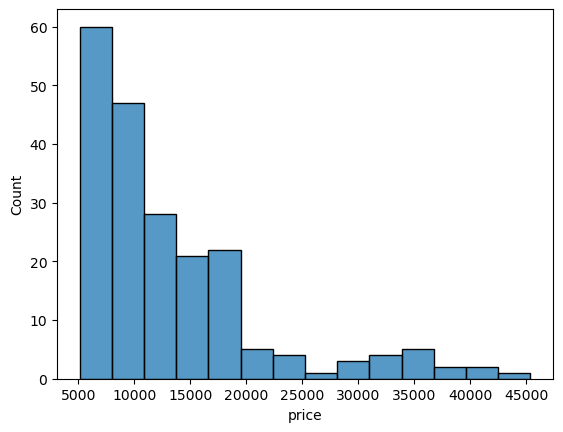

In [409]:
sns.histplot(df['price'])

<AxesSubplot: xlabel='doornumber', ylabel='Count'>

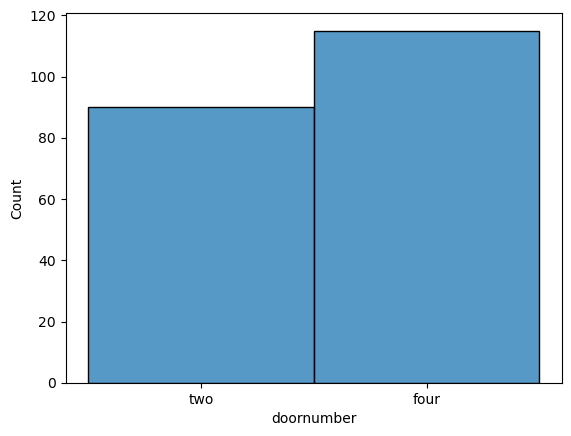

In [410]:
sns.histplot(df['doornumber'])

<AxesSubplot: xlabel='drivewheel', ylabel='Count'>

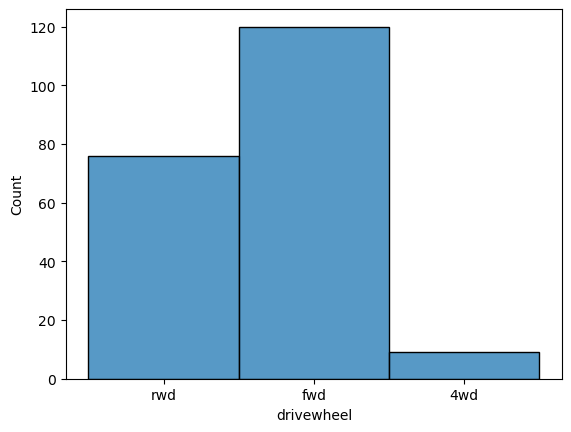

In [411]:
sns.histplot(df['drivewheel'])

<AxesSubplot: xlabel='enginelocation', ylabel='Count'>

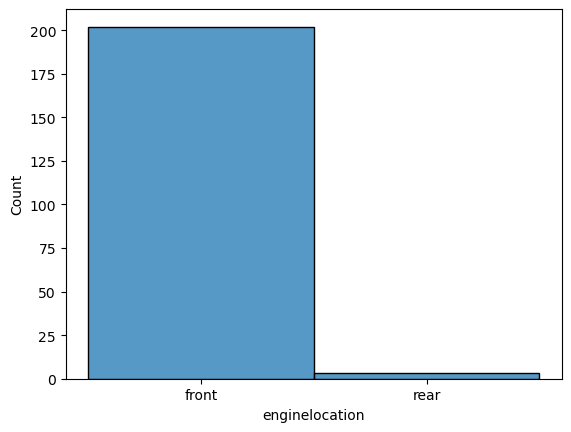

In [412]:
sns.histplot(df['enginelocation'])

<AxesSubplot: xlabel='carbody', ylabel='Count'>

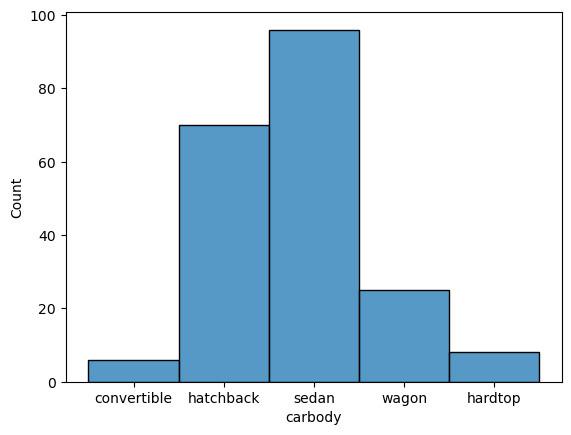

In [413]:
sns.histplot(df['carbody'])

- [ ] При необходимости выполнить полезные преобразования данных (например, трансформировать категариальные признаки в количественные), убрать ненужные признаки, создать новые (**Feature Engineering**).
- [ ] * (+2 балла) Перед обучением моделей подобрать наилучшее количество (и само подмножество) признаков, например используя **Recursive Feature Elimination (RFE)** из **sklearn**.

In [414]:
df = df.drop(columns=['car_ID','CarName']) # Удаление ненужных признаков

In [415]:
df.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [416]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

# Подготовка данных
df = df.drop_duplicates()
cols = ['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg']
X = df[cols]
y = df['price']
X = pd.get_dummies(X, drop_first=True) # Преобразование категориальных данных

model = LinearRegression()# Создание модели линейной регрессии

# Создание RFE с линейной регрессией 
rfe = RFE(estimator=model, n_features_to_select=100) # оптимальное число: 100 признаков
rfe.fit(X, y)

selected_features = X.columns[rfe.support_]
print('Selected features: %s' % list(selected_features))

Selected features: ['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'fueltype_gas', 'aspiration_turbo', 'doornumber_two', 'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd', 'enginelocation_rear', 'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv', 'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve', 'cylindernumber_two', 'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi', 'fuelsystem_spdi', 'fuelsystem_spfi']


In [417]:
X.shape

(204, 43)

In [418]:
X = X[list(selected_features)] # Удаление ненужных признаков

- [ ] Случайным образом разбить данные на **обучающую** и **тестовую** выборки, используя методы существующих библиотек.
- [ ] При обучении моделей использовать **масштабирование данных**.

In [419]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99) # Разбиение на обучающие и тестовые выборки

In [420]:
from sklearn.preprocessing import StandardScaler

# Масштабирование данных
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
y_train_scaled = y_train.values.reshape(-1, 1)
y_test_scaled = y_test.values.reshape(-1, 1)

- [ ] * (+1 балл) Во все ваши реализации добавить возможность настройки нужных **гиперпараметров**, а в процессе обучения **всех** моделей осуществить подбор оптимальных значений этих гиперпараметров.

In [421]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge


parameters = { 'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]} # Различные параметры для Grid Search
ridge = Ridge()
grid_search = GridSearchCV(ridge, parameters, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print("Best parameter:", grid_search.best_params_)
print("Best MSE:", -grid_search.best_score_)
alpha_ridge = grid_search.best_params_['alpha'] # Присвоение Best parameter

Best parameter: {'alpha': 1.0}
Best MSE: 6955305.009927912


- [] Обучить модель на обучающей выборке, используя функцию **gradient_descent(X, y)**. Оценить качество модели на обучающей и тестовой выборках, используя **MSE**, **RMSE** и $R^2$.

In [422]:
from sklearn.metrics import mean_squared_error, r2_score

# Функция для предсказания
def predict(X, w):
    X_b = np.c_[np.ones((X.shape[0], 1)), X]
    return X_b.dot(w)


w = gradient_descent(X_train, y_train)
w1  = stochastic_gradient_descent(X_train,y_train_scaled)
w2 = mini_batch_gradient_descent(X_train,y_train_scaled)

# gradient_descent
# Предсказания
y_train_pred = predict(X_train, w)
y_test_pred = predict(X_test_scaled, w)

# MSE и RMSE
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

# R²
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print('gradient_descent')
print(f"MSE train: {mse_train}, MSE test: {mse_test}")
print(f"RMSE train: {rmse_train}, RMSE test: {rmse_test}")
print(f"R² train: {r2_train}, R² test: {r2_test}\n")

# stochastic_gradient_descent
# Предсказания
y_train_pred1 = predict(X_train, w1)
y_test_pred1 = predict(X_test_scaled, w1)

# MSE и RMSE
mse_train1 = mean_squared_error(y_train_scaled, y_train_pred1)
mse_test1 = mean_squared_error(y_test_scaled, y_test_pred1)
rmse_train1 = np.sqrt(mse_train1)
rmse_test1 = np.sqrt(mse_test1)

# R²
r2_train1 = r2_score(y_train_scaled, y_train_pred1)
r2_test1 = r2_score(y_test_scaled, y_test_pred1)

print('stochastic_gradient_descent')
print(f"MSE train: {mse_train1}, MSE test: {mse_test1}")
print(f"RMSE train: {rmse_train1}, RMSE test: {rmse_test1}")
print(f"R² train: {r2_train1}, R² test: {r2_test1}\n")

# mini_batch_gradient_descent
# Предсказания
y_train_pred2 = predict(X_train, w2)
y_test_pred2 = predict(X_test_scaled, w2)

# MSE и RMSE
mse_train2 = mean_squared_error(y_train_scaled, y_train_pred2)
mse_test2 = mean_squared_error(y_test_scaled, y_test_pred2)
rmse_train2 = np.sqrt(mse_train2)
rmse_test2 = np.sqrt(mse_test2)

# R²
r2_train2 = r2_score(y_train_scaled, y_train_pred2)
r2_test2 = r2_score(y_test_scaled, y_test_pred2)

print('mini_batch_gradient_descent')
print(f"MSE train: {mse_train2}, MSE test: {mse_test2}")
print(f"RMSE train: {rmse_train2}, RMSE test: {rmse_test2}")
print(f"R² train: {r2_train2}, R² test: {r2_test2}\n")

gradient_descent
MSE train: 4022598.743430872, MSE test: 10555622.501025561
RMSE train: 2005.6417285823686, RMSE test: 3248.9417509437685
R² train: 0.9397440980066365, R² test: 0.7866494751148672

stochastic_gradient_descent
MSE train: 5.651866813905577e+80, MSE test: 2.9509003933044175e+79
RMSE train: 2.377365519625785e+40, RMSE test: 5.4322190615847014e+39
R² train: -8.466127360438052e+72, R² test: -5.96436778346397e+71

mini_batch_gradient_descent
MSE train: 4863776.687744641, MSE test: 7953381.623206895
RMSE train: 2205.3971723353234, RMSE test: 2820.174041297256
R² train: 0.9271438017791486, R² test: 0.839246037478311



- [ ] Обучить модель, используя существующую библиотеку. Например, в **sklearn** для $L_2$-регуляризатора можно использовать **Ridge**. Сравнить качество с Вашей реализацией.

In [423]:
# Обучение Ridge-регрессии
ridge_model = Ridge(alpha=alpha_ridge)
ridge_model.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred_ridge = ridge_model.predict(X_test)

# Оценка качества модели
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f'Ridge MSE: {mse_ridge}')
print(f'Ridge RMSE: {rmse_ridge}')
print(f'Ridge R^2: {r2_ridge}')

Ridge MSE: 108492704100486.95
Ridge RMSE: 10415983.107728573
Ridge R^2: -2192856.4429217586


- [ ] Повторить тоже самое, но используя **кросс-валидацию**.

In [424]:
from sklearn.model_selection import cross_val_score

def cross_val_evaluate(model, X, y, cv=5):
    mse = -cross_val_score(model, X, y, cv=cv, scoring='neg_mean_squared_error')
    rmse = np.sqrt(mse)
    r2 = cross_val_score(model, X, y, cv=cv, scoring='r2')
    
    print(f'Mean MSE: {mse.mean():.2f} ± {mse.std():.2f}')
    print(f'Mean RMSE: {rmse.mean():.2f} ± {rmse.std():.2f}')
    print(f'Mean R2: {r2.mean():.2f} ± {r2.std():.2f}\n')

print("Cross-val Ridge:")
cross_val_evaluate(ridge_model, X, y, cv=5)

Cross-val Ridge:
Mean MSE: 22251623.44 ± 7162298.72
Mean RMSE: 4656.66 ± 753.07
Mean R2: 0.43 ± 0.39



- [ ] Создать таблицу, со строками (mse-train, mse-test, rmse-train, rmse-test, r2-train, r2-test) и столбцами (Fold1, Fold2, ..., Foldk, E, STD), где k --- количество фолдов в кросс-валидации, **E** --- мат. ожидание и **STD** --- стандартное отклонение. Сделать выводы.

In [425]:
from sklearn.model_selection import KFold

def cross_validation_scores(X, y, w_init, alpha=0.01, n_iterations=1000, lambda_=0.01, n_folds=5):
    kfold = KFold(n_splits=n_folds, shuffle=True, random_state=42)
    
    mse_train_list, mse_test_list = [], []
    rmse_train_list, rmse_test_list = [], []
    r2_train_list, r2_test_list = [], []
    
    for train_index, test_index in kfold.split(X):
        X_train_fold, X_test_fold = X[train_index], X[test_index]
        y_train_fold, y_test_fold = y[train_index], y[test_index]
        
        # Обучение модели на каждом фолде
        w = gradient_descent(X_train_fold, y_train_fold, alpha, n_iterations, lambda_)
        
        # Предсказания
        y_train_pred = predict(X_train_fold, w)
        y_test_pred = predict(X_test_fold, w)
        
        # MSE и RMSE
        mse_train = mean_squared_error(y_train_fold, y_train_pred)
        mse_test = mean_squared_error(y_test_fold, y_test_pred)
        rmse_train = np.sqrt(mse_train)
        rmse_test = np.sqrt(mse_test)
        
        # R²
        r2_train = r2_score(y_train_fold, y_train_pred)
        r2_test = r2_score(y_test_fold, y_test_pred)
        
        # Добавление данных
        mse_train_list.append(mse_train)
        mse_test_list.append(mse_test)
        rmse_train_list.append(rmse_train)
        rmse_test_list.append(rmse_test)
        r2_train_list.append(r2_train)
        r2_test_list.append(r2_test)
    
    # Создание таблицы с результатами
    results = {
        "Fold": [f"Fold{i+1}" for i in range(n_folds)] + ['E (Mean)', 'STD (Std Dev)'],
        "MSE Train": mse_train_list + [np.mean(mse_train_list), np.std(mse_train_list)],
        "MSE Test": mse_test_list + [np.mean(mse_test_list), np.std(mse_test_list)],
        "RMSE Train": rmse_train_list + [np.mean(rmse_train_list), np.std(rmse_train_list)],
        "RMSE Test": rmse_test_list + [np.mean(rmse_test_list), np.std(rmse_test_list)],
        "R² Train": r2_train_list + [np.mean(r2_train_list), np.std(r2_train_list)],
        "R² Test": r2_test_list + [np.mean(r2_test_list), np.std(r2_test_list)]
    }
    
    # Преобразование в DataFrame
    results_df = pd.DataFrame(results)
    return results_df


X_np = np.array(X_train)
y_np = np.array(y_train).flatten()
results_df = cross_validation_scores(X_np, y_np, w)

# Вывод результатов
results_df.head()

,Fold,MSE Train,MSE Test,RMSE Train,RMSE Test,R² Train,R² Test
0,Fold1,3.876873e+06,1.020513e+07,1968.977569,3194.546371,0.945960,0.779727
1,Fold2,3.357720e+06,1.648316e+07,1832.408230,4059.945565,0.928206,0.879581
2,Fold3,3.677138e+06,6.160050e+06,1917.586621,2481.944707,0.947430,0.884186
3,Fold4,4.227773e+06,1.918968e+07,2056.154918,4380.602861,0.942515,0.461511
4,Fold5,3.991998e+06,9.509045e+06,1997.998495,3083.673906,0.943717,0.801887


Вывод: 
- MSE Test на фолдах 3 и 5 сильно выбивается;
- RMSE Test на фолде 2 сильно выбивается;
- R² Test на фолде 4 сильно выбивается;
- Возможно данные содержат выбросы или сложности для предсказания, что объясняет аномальные выбивания в фолдах на MSE Test, RMSE Test и R² Test